## Imports

In [195]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


### 1. Setup jupyter lab or RStudio. Other options for python are: 
 * PyCharm
 * Visual Studio Code
 * Atom (with Hydrogen)
 * Spyder

### 2. Generate an artificial dataset using a linear function with known parameters and some added noise.
* Study the effect of the number of examples N (from 2 to 200) and of noise dispersion on the coefficient estimates. Are the estimates of the coefficients stable?
* Study the effect of N on R2 (R square).
* Increase the dispersion of the noise. What is the effect on R2?
* Produce plots with the variation of R2 and of the parameters with the number of examples (up to 5000) and with the dispersion of the noise (sd between 0 and 5).


In [196]:
#Linear function f(x) with noise

def f(num_elem=200, n_dispersion=5):
    noise_dispersion = np.random.normal(0, n_dispersion, num_elem)
    np.random.seed(23)

    x= np.random.rand(num_elem)*10
    y=x*2 + 3 + noise_dispersion
    
    return x, y

In [197]:
def createModel(x, y):
    X=x[:,np.newaxis]

    model = LinearRegression(fit_intercept=True)
    model.fit(X,y)
    
    return model, X
    

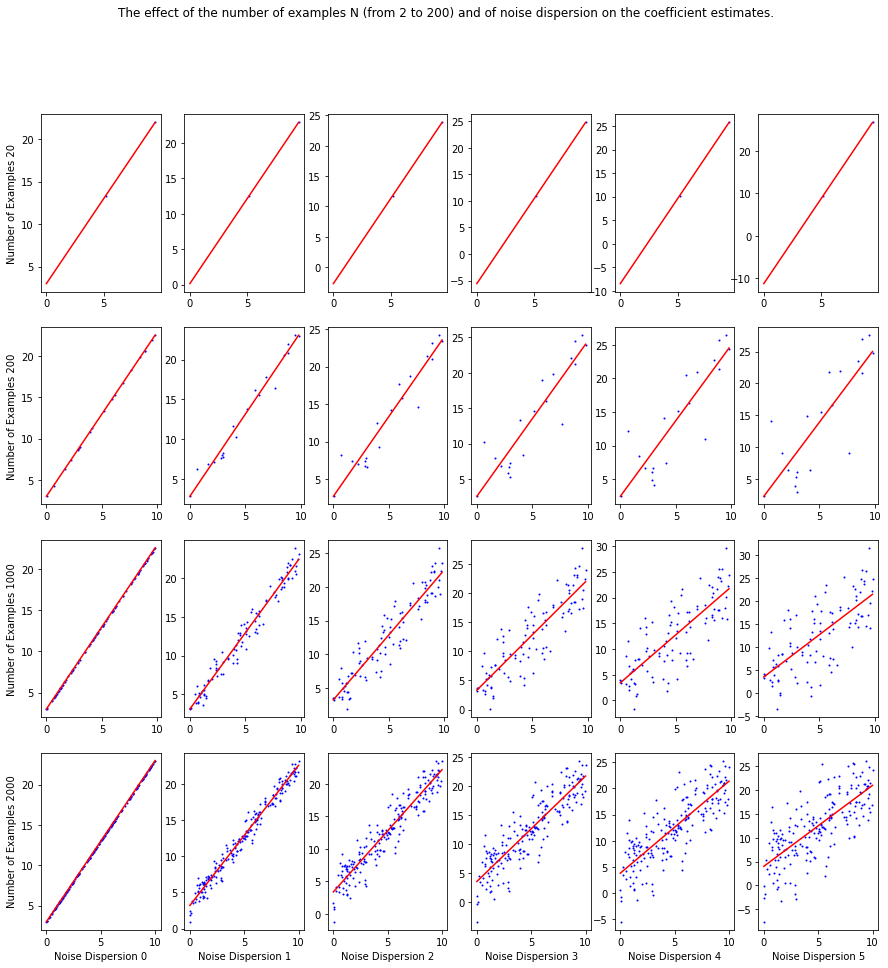

In [198]:
n_s = [2, 20, 100, 200]

fig, axs = plt.subplots(len(n_s), 6, figsize=(15, 15))
fig.suptitle('The effect of the number of examples N (from 2 to 200) and of noise dispersion on the coefficient estimates.')

for i in range(len(n_s)):
    for n_dispersion in range(6):
        
        n = n_s[i]
        x, y = f(n, n_dispersion)
        
        model, X = createModel(x, y)

        xfit = np.array([0,max(x)])
        yfit = model.predict(xfit[:,np.newaxis])

        axs[i, n_dispersion].plot(x, y, 'o', color='blue', markersize=1)
        
        if i == len(n_s)-1:
            axs[i, n_dispersion].set_xlabel('Noise Dispersion ' + str(n_dispersion))
            
        if n_dispersion == 0:
            axs[i, n_dispersion].set_ylabel('Number of Examples '+ str(n) + str(n_dispersion))

        axs[i, n_dispersion].plot(xfit, yfit,color='red');
        
        

In the example of the analyzed function, the model showed a tendency to follow the function trend. However, it was observed that the greater the number of explants or the lower noise dispersion, the more accurate the results were.

### Variation of Beta

Text(0.5, 0, 'Dispersion of the Noise')

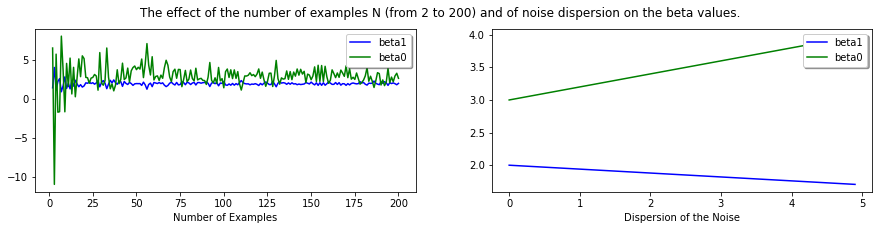

In [199]:
n_s = np.arange(2, 201)
noise_dispersion_s = np.arange(0, 5, .1)

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(15, 3))
fig.suptitle('The effect of the number of examples N (from 2 to 200) and of noise dispersion on the beta values.')

beta1 = []
beta0 = []

for i in range(len(n_s)):
    x, y = f(n_s[i], 5)
    model, X = createModel(x, y)
    
    beta1.append(model.coef_[0])
    beta0.append(model.intercept_)

ax1.plot(n_s, beta1, color='blue', markersize=1)
ax1.plot(n_s, beta0, color='green', markersize=1)
ax1.legend( ('beta1', 'beta0'), loc='upper right', shadow=True)
ax1.set_xlabel('Number of Examples')

beta1 = []
beta0 = []

for noise_dispersion in noise_dispersion_s:
    x, y = f(200, noise_dispersion)

    model, X = createModel(x, y)
    
    beta1.append(model.coef_[0])
    beta0.append(model.intercept_)
    
ax2.plot(noise_dispersion_s, beta1, color='blue', markersize=1)
ax2.plot(noise_dispersion_s, beta0, color='green', markersize=1)
ax2.legend( ('beta1', 'beta0'), loc='upper right', shadow=True)
ax2.set_xlabel('Dispersion of the Noise')
ax2.set_xlabel('Dispersion of the Noise')


### R2

Text(0.5, 0, 'Dispersion of the Noise')

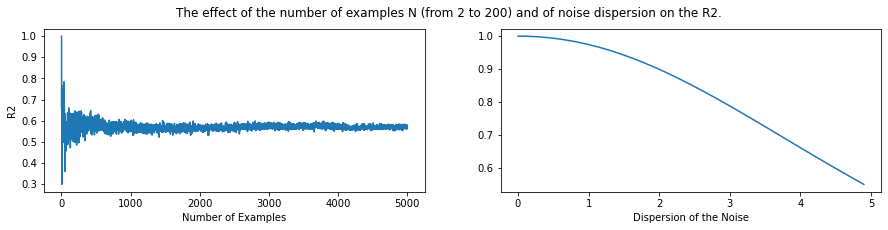

In [200]:
n_s = np.arange(2, 5000)
noise_dispersion_s = np.arange(0, 5, .1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 3))
fig.suptitle('The effect of the number of examples N (from 2 to 200) and of noise dispersion on the R2.')

r2 = []

for i in range(len(n_s)):
    x, y = f(n_s[i], 5)
    model, X = createModel(x, y)
    r2.append(model.score(X,y))

ax1.plot(n_s, r2, markersize=1)
ax1.set_xlabel('Number of Examples')
ax1.set_ylabel('R2')

r2 = []

for noise_dispersion in noise_dispersion_s:
    x, y = f(200, noise_dispersion)
    model, X = createModel(x, y)
    
    r2.append(model.score(X,y))
    
ax2.plot(noise_dispersion_s, r2, markersize=1)
ax2.set_xlabel('Dispersion of the Noise')


### 3. Perform a similar study using a random function $f(x)$.

### 4. Generate a dataset with 200 cases with the two input variables from above (one random and the other non random) and an output variable having a linear relation (plus noise) with the non random input variable.
* Which coefficients do you get?
* What are the p-values of the coefficients?
* How do we interpret them?

### 5. A linear model can be found without 'searching'. Please explain the previous statement.